<a href="https://colab.research.google.com/github/InduwaraGayashan001/TensorFlow/blob/main/Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["image.cmap"] = "gray"

In [3]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset

In [24]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

print(X_train_all.shape)
print(y_train_all.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [25]:
X_train = X_train_all[10000:]
y_train = y_train_all[10000:]
X_valid = X_train_all[:10000]
y_valid = y_train_all[:10000]

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


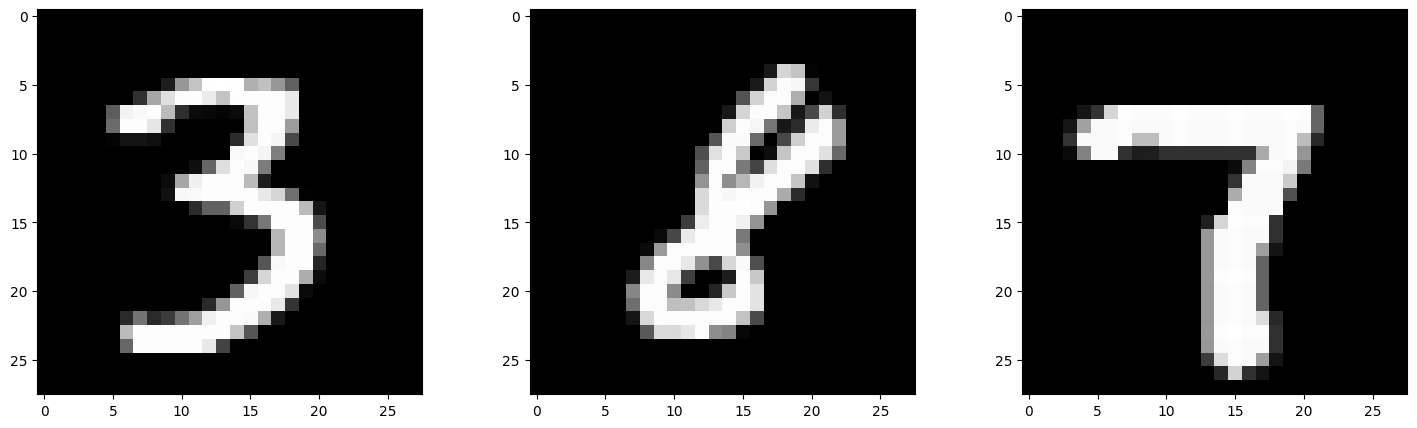

In [26]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(X_train[i], cmap="gray")
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Data Processing

In [27]:
X_train = X_train.reshape( X_train.shape[0],  X_train.shape[1] * X_train.shape[2])
X_train = X_train.astype('float32') / 255

X_valid = X_valid.reshape( X_valid.shape[0],  X_valid.shape[1] * X_valid.shape[2])
X_valid = X_valid.astype('float32') / 255

x_test = X_test.reshape( X_test.shape[0],  X_test.shape[1] * X_test.shape[2])
x_test = x_test.astype('float32') / 255

In [28]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

# Model Implementation

In [29]:
model = Sequential()

model.add(Dense(128,activation = 'relu',input_shape = (X_train.shape[1],)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training

In [31]:
training_results = model.fit(X_train, y_train, epochs = 21, batch_size = 64, validation_data = (X_valid, y_valid))

Epoch 1/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8615 - loss: 0.4795 - val_accuracy: 0.9434 - val_loss: 0.1813
Epoch 2/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9607 - loss: 0.1310 - val_accuracy: 0.9564 - val_loss: 0.1431
Epoch 3/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9752 - loss: 0.0861 - val_accuracy: 0.9659 - val_loss: 0.1199
Epoch 4/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9822 - loss: 0.0637 - val_accuracy: 0.9698 - val_loss: 0.1132
Epoch 5/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9866 - loss: 0.0496 - val_accuracy: 0.9681 - val_loss: 0.1215
Epoch 6/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9901 - loss: 0.0382 - val_accuracy: 0.9714 - val_loss: 0.1204
Epoch 7/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9914 - loss: 0.0301 - val_accuracy: 0.9704 - val_loss: 0.1360
Epoch 8/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9936 - loss: 0.0243 - val_accuracy: 0.

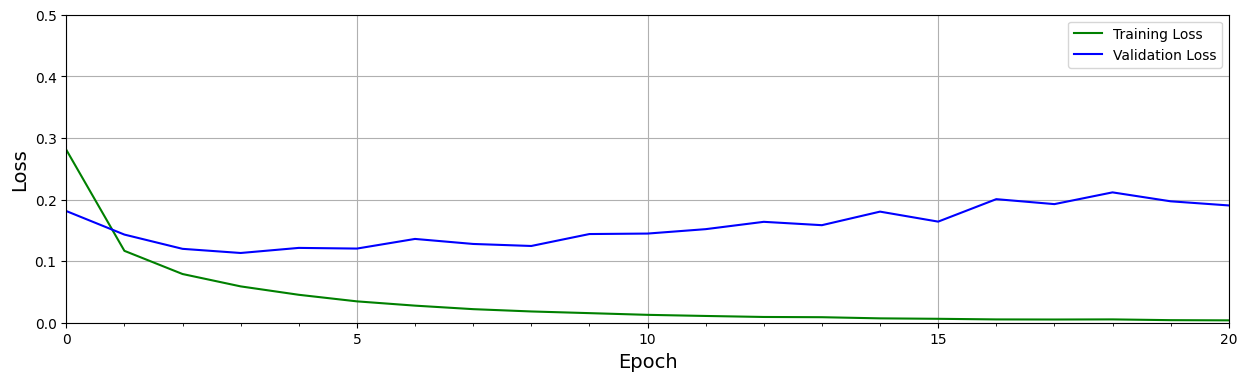

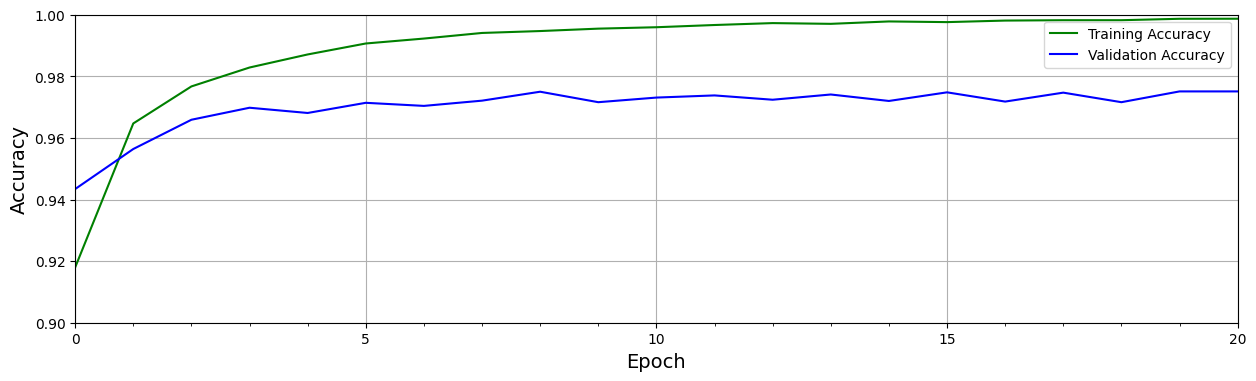

In [32]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

# Retrieve training results.
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 0.5],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.9, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

# Evaluation

In [34]:
predictions = model.predict(x_test)
index = 0
print("Ground truth for test digit: " + str(np.argmax(y_test[index])))
print("Prediction for each class")
for i in range(10):
    print(str(i) + ": " + str(predictions[index][i]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ground truth for test digit: 7
Prediction for each class
0: 4.603004e-25
1: 4.7410354e-22
2: 4.6099437e-18
3: 1.3262318e-21
4: 1.1159208e-23
5: 2.0695603e-31
6: 0.0
7: 0.99999994
8: 2.1470614e-28
9: 2.4129593e-18


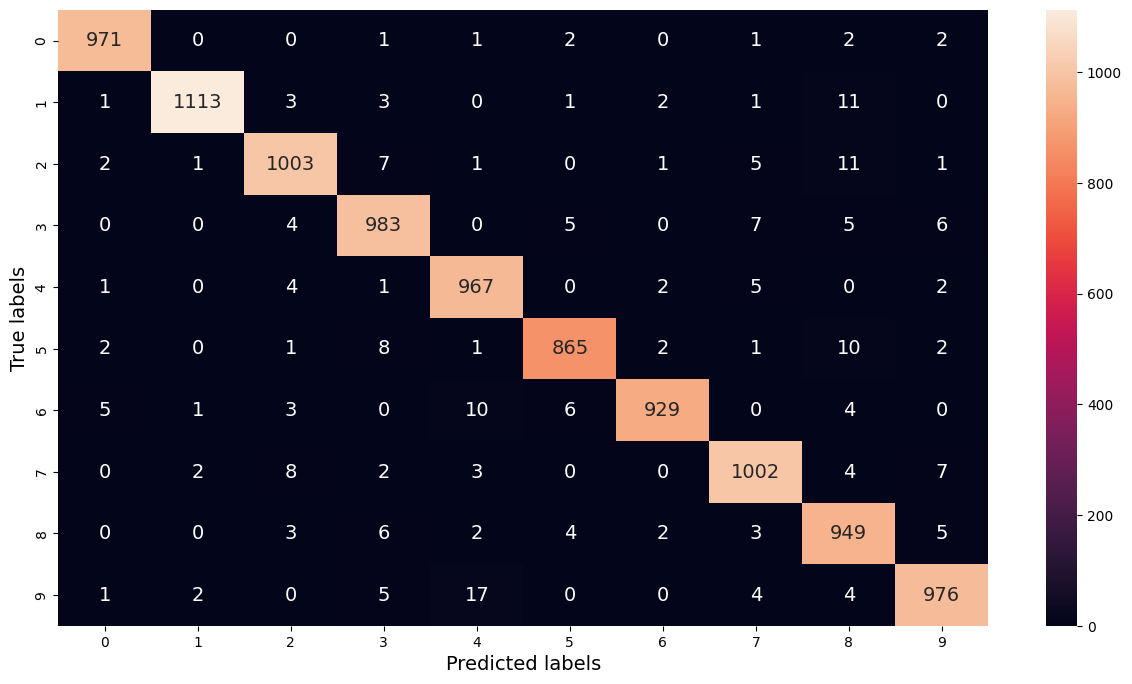

In [37]:
predicted_labels = [np.argmax(i) for i in predictions]
y_test_integer_labels= tf.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(y_test_integer_labels, predicted_labels)

plt.figure(figsize=(15, 8))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 14})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()